# Regresión Lineal con Python

Su vecina es una agente de bienes raíces y quiere ayuda para predecir los precios de las viviendas en las regiones de EE. UU. Sería genial si de alguna manera pudieras crear un modelo para ella que le permitiera poner algunas características de una casa y devolver un estimado del precio en la que la casa se vendería.

Ella le ha preguntado si podría ayudarla con sus nuevas habilidades de ciencia de datos. ¡Usted dice que sí y decide que la Regresión lineal podría ser un buen camino para resolver este problema!

Luego, su vecino le brinda información sobre un grupo de casas en regiones de los Estados Unidos, todo está en el conjunto de datos: USA_Housing.csv.

Los datos contienen las siguientes columnas:

* 'Avg. Area Income': Prom de ingresos de los residentes de la ciudad donde la casa está ubicada.
* 'Avg. Area House Age': Promedio de edad de las casas en la misma ciudad
* 'Avg. Area Number of Rooms': Promedio del Número de ambientes de las casas en la misma ciudad
* 'Avg. Area Number of Bedrooms': Promedio del número de dormitorios para las casas en la misma ciudad
* 'Area Population': Población de la ciudad en la que la casa esta ubicada
* 'Price': Precio en la que la casa se vendió
* 'Address': Dirección de la casa

**¡Empecemos!**
## Revisemos los datos
Hemos podido obtener algunos datos de los precios de vivienda como un conjunto de csv, ¡preparemos nuestro entorno con las bibliotecas que necesitaremos y luego importemos los datos!
### Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Revisemos los datos

In [3]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [5]:
USAhousing.head(10)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   
5      80175.754159             4.988408                   6.104512   
6      64698.463428             6.025336                   8.147760   
7      78394.339278             6.989780                   6.620478   
8      59927.660813             5.362126                   6.393121   
9      81885.927184             4.423672                   8.167688   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   
5                          4.04     26748.428425  1.068138e+06   
6                          3.41     60828.249085  1.502056e+06   
7                          2.42     36516.358972  1.573937e+06   
8                          2.30     29387.396003  7.988695e+05   
9                          6.10     40149.965749  1.545155e+06   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386  
5  06039 Jennifer Islands Apt. 443\nTracyport, KS...  
6  4759 Daniel Shoals Suite 442\nNguyenburgh, CO ...  
7     972 Joyce Viaduct\nLake William, TN 17778-6483  
8                          USS Gilbert\nFPO AA 20957  
9                   Unit 9446 Box 0958\nDPO AE 97025

In [6]:
USAhousing.tail()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...

In [8]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [11]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análisis de Datos Exploratorio

¡Creamos algunos gráficos simples para verificar los datos!

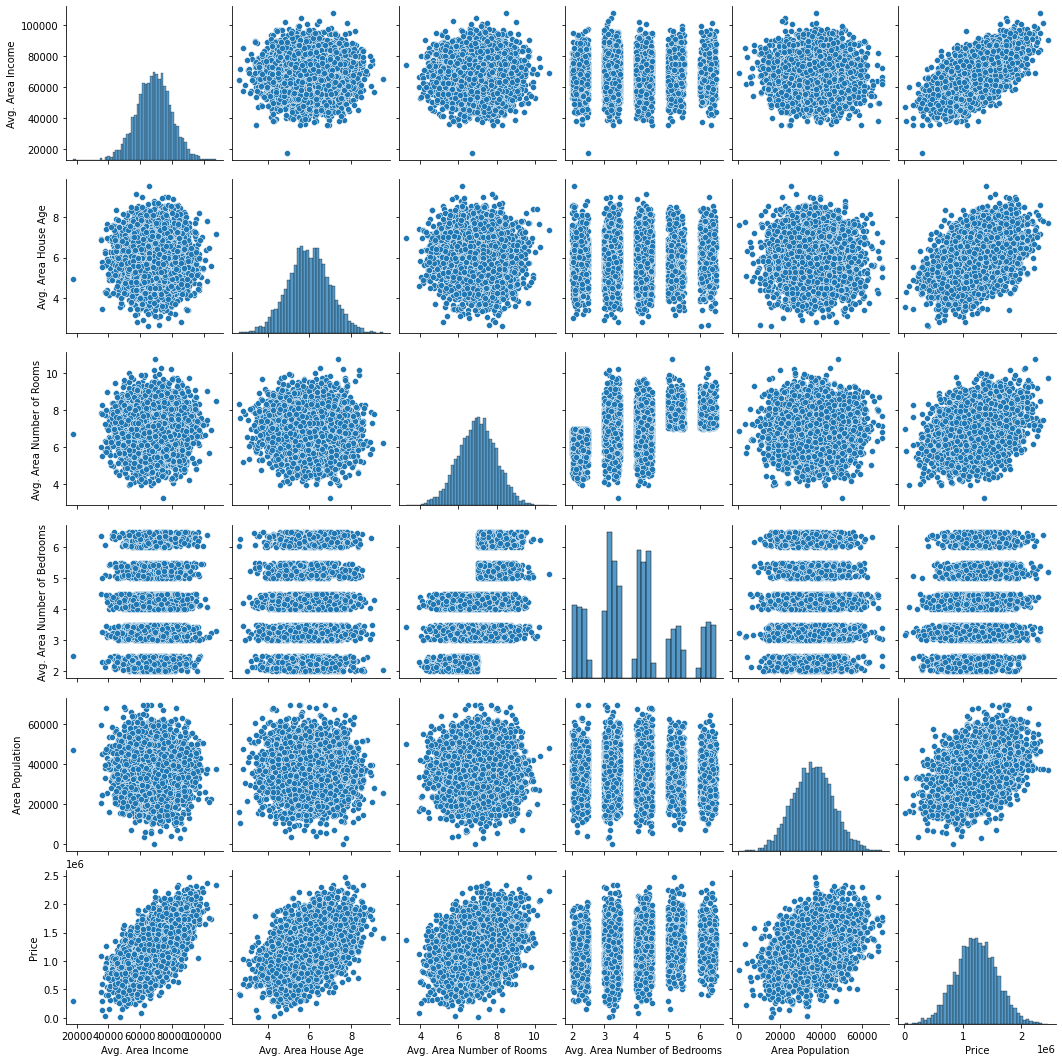

In [12]:
sns.pairplot(USAhousing)

/home/alex/Documentos/ApuntesSM/CICLO-VII/IA/Parte_practica/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

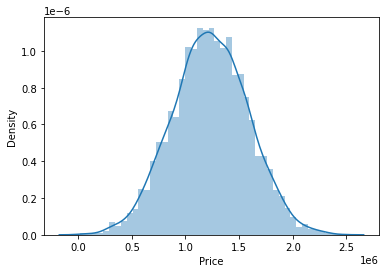

In [14]:
sns.distplot(USAhousing['Price'])

<AxesSubplot:>

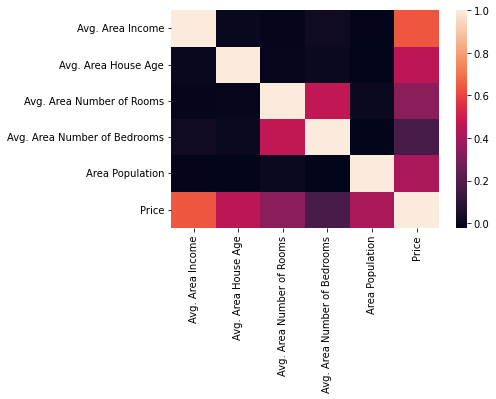

In [15]:
sns.heatmap(USAhousing.corr())

## Entrenando el Modelo de Regresión Lineal

¡Comencemos ahora por entrenar el modelo de regresión! Tendremos que dividir primero nuestros datos en una matriz X que contenga las características para entrenar, y un arreglo y con la variable objetivo, en este caso la columna Precio. Descartamos la columna 'Address' porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

### arreglos x e y

In [16]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Dividir datos de entrenamiento y prueba

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Formaremos un modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Crear y Entrenar el Modelo

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluación del Modelo

Evaluemos el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [22]:
# imprime el interceptor
print(lm.intercept_)

-2640159.7968526958


In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

Coeficiente
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpretación de los coeficientes:

- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Income** está asociado con un **incremento de \$21.52** .
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area House Age** está asociado con un **incremento de \$164883.28**.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Number of Rooms** está asociado con un **incremento de \$122368.67**.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Number of Bedrooms** está asociado con un **incremento de \$2233.80**.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Area Population** está asociado con un **incremento de \$15.15**.

¿Esto tiene sentido? Probablemente no porque se inventó esta información. Si quieres datos reales para repetir este tipo de análisis, revise el dataset [boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predicciones de nuestro modelo

¡Aprovechemos las predicciones de nuestro conjunto de pruebas y veamos qué tan bien lo hizó!

In [24]:
X_test.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1718      66774.995817             5.717143                   7.795215   
2511      62184.539375             4.925758                   7.427689   
345       73643.057298             6.766853                   8.337085   
2521      61909.041438             6.228343                   6.593138   
54        72942.705059             4.786222                   7.319886   

      Avg. Area Number of Bedrooms  Area Population  
1718                          4.32     36788.980327  
2511                          6.22     26008.309124  
345                           3.34     43152.139577  
2521                          4.29     28953.925377  
54                            6.41     24377.909049

In [25]:
predictions = lm.predict(X_test)
predictions

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

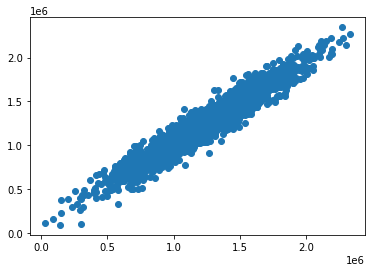

In [30]:
plt.scatter(y_test,predictions)

**Histograma residual**

/home/alex/Documentos/ApuntesSM/CICLO-VII/IA/Parte_practica/env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


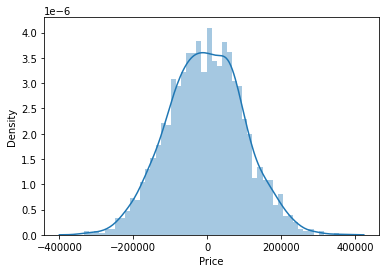

In [27]:
sns.distplot((y_test-predictions),bins=50);

## Metricas de Evaluación de Regresión


Aquí hay tres métricas de evaluación comunes para los problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades de "y".

Todas estas son **funciones de pérdida**, y las queremos minimizar.

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


Explora el Dataset Boston mencionado anteriormente.

¡A continuación resuelve el ejercicio propuesto!

## ¡Muy bien!